In [ ]:
#Mental Health prediction model 1.23
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv(r'D:\Anshveer - Git - Mental Health\Mental_Health_FINAL\data\survey.csv')

In [3]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


<Axes: xlabel='Country'>

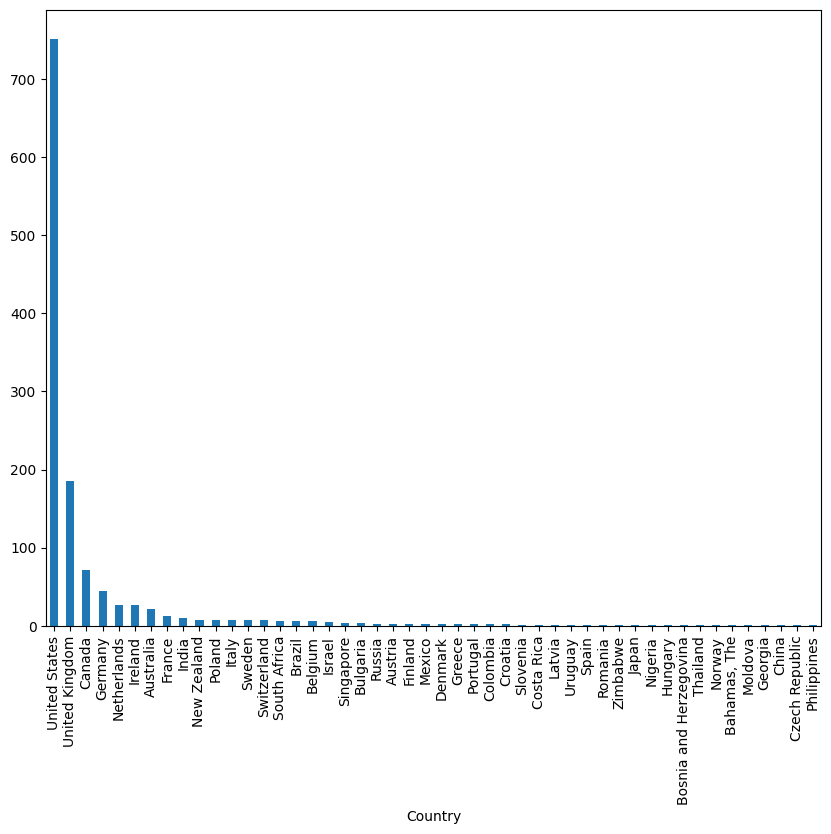

In [4]:
data['Country'].value_counts().plot(kind='bar',figsize=(10,8))

In [5]:
data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [6]:
data['self_employed'].value_counts()

self_employed
No     1095
Yes     146
Name: count, dtype: int64

In [7]:
data['self_employed'].fillna('No',inplace=True)

In [8]:
data['work_interfere'].value_counts()

work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64

In [9]:
data['work_interfere'].fillna('N/A',inplace=True)

<Axes: xlabel='Age'>

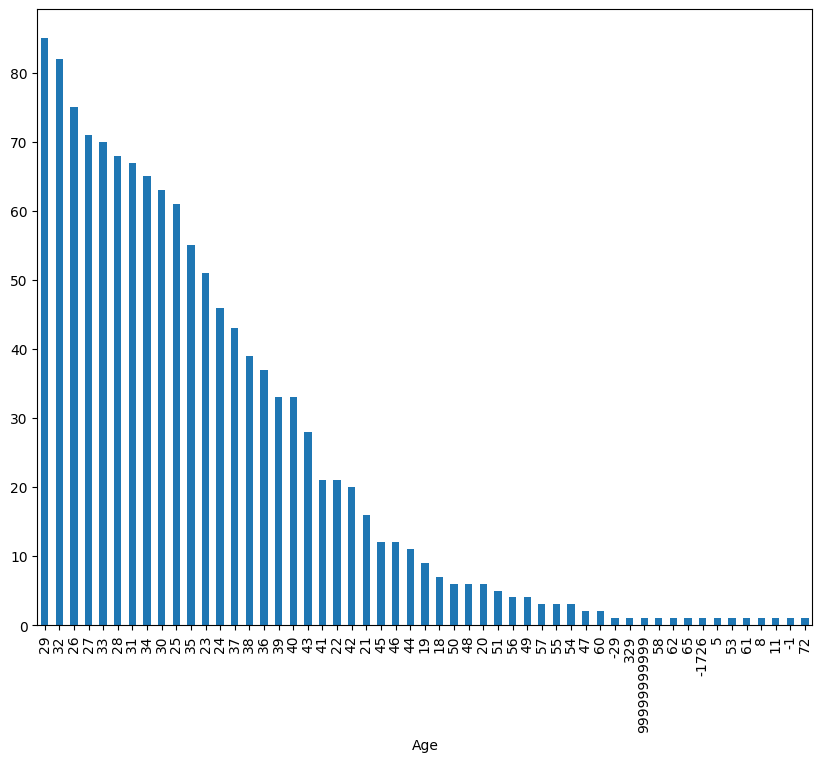

In [10]:
data['Age'].value_counts().plot(kind='bar',figsize=(10,8))

In [11]:
data.drop(data[(data['Age']>60)| (data['Age']<18)].index,inplace=True)

<Axes: xlabel='Gender'>

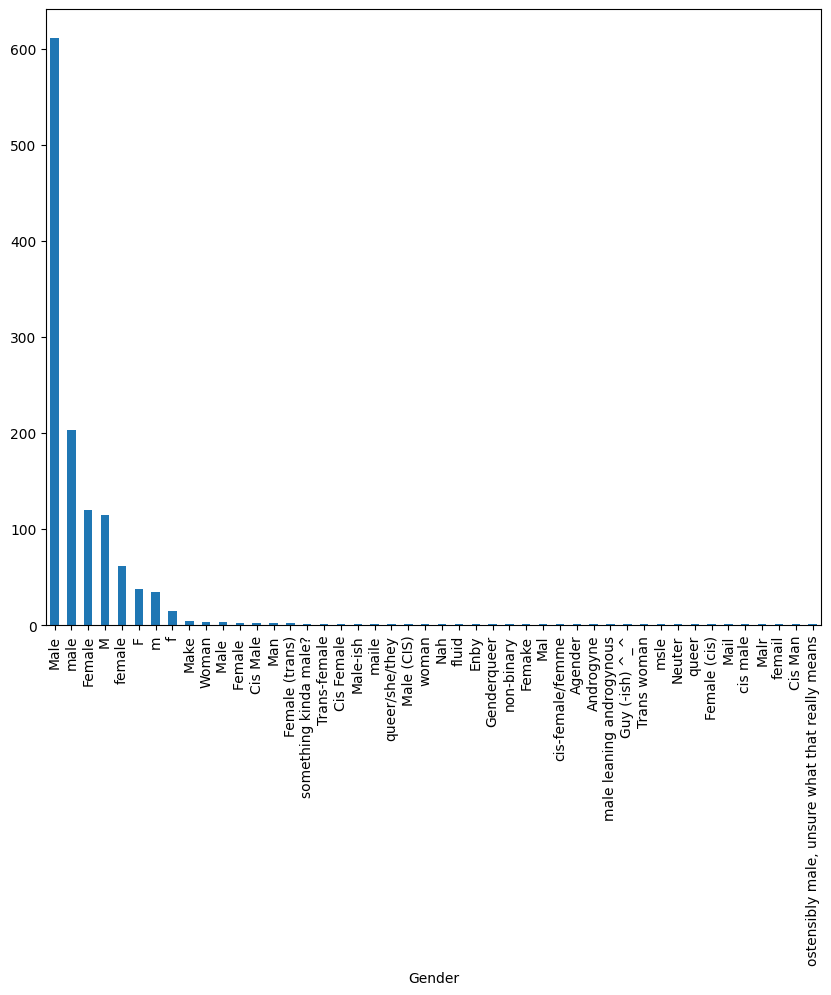

In [12]:
data['Gender'].value_counts().plot(kind='bar',figsize=(10,8))

In [13]:
data['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                        'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                        'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make '], 
                       'Male', inplace=True)

data['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                        'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                        'woman'], 
                       'Female', inplace=True)

data["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                        'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                        'Agender', 'A little about you', 'Nah', 'All',
                        'Ostensibly male, unsure what that really means',
                        'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                        'Guy (-ish) ^_^', 'Trans woman',], 
                       'Non-Binary', inplace=True)

Numeric columns: ['Age']
Boxplot after capping: Age


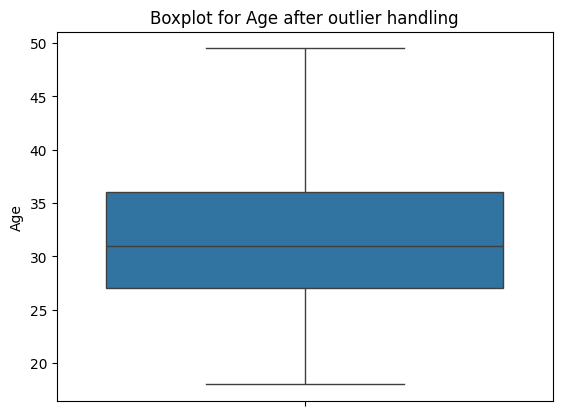

In [14]:
num_features = data.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", list(num_features))


IQR = []
lower = []
upper = []

for col in num_features:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    iqr = Q3 - Q1
    IQR.append(iqr)
    
    lower.append(Q1 - 1.5 * iqr)
    upper.append(Q3 + 1.5 * iqr)


for i, col in enumerate(num_features):
    data[col] = np.where(data[col] > upper[i], upper[i],
                         np.where(data[col] < lower[i], lower[i], data[col]))


for col in num_features:
    print(f"Boxplot after capping: {col}")
    sb.boxplot(data[col])
    plt.title(f"Boxplot for {col} after outlier handling")
    plt.show()

Text(0.5, 0, 'Age')

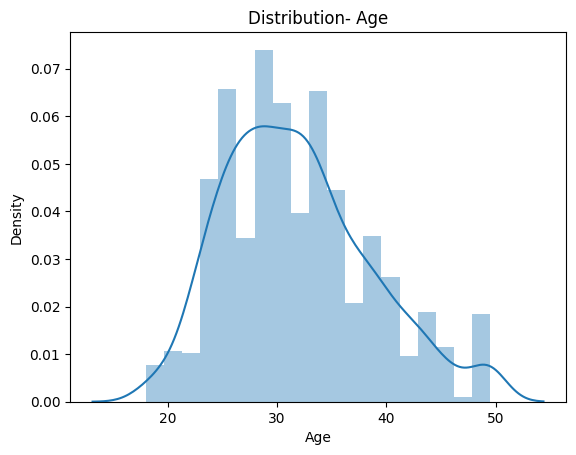

In [15]:
sb.distplot(data["Age"])
plt.title("Distribution- Age")
plt.xlabel("Age")

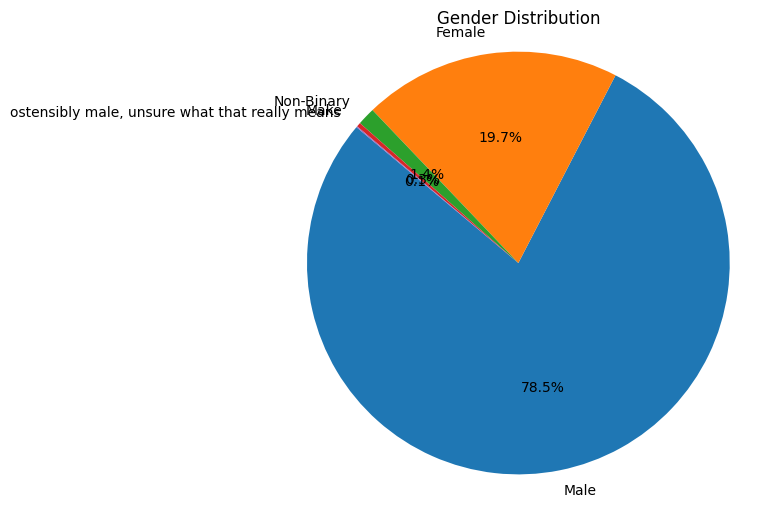

In [16]:
labels = data['Gender'].value_counts().index
sizes = data['Gender'].value_counts().values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Gender Distribution")
plt.axis('equal') 
plt.show()

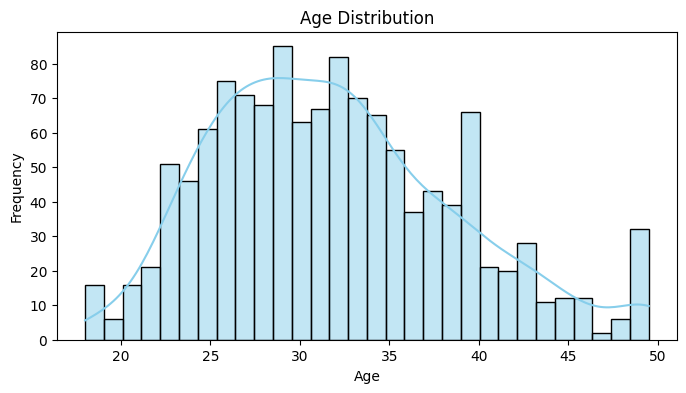

In [17]:
plt.figure(figsize=(8, 4))
sb.histplot(data['Age'], kde=True, bins=30, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

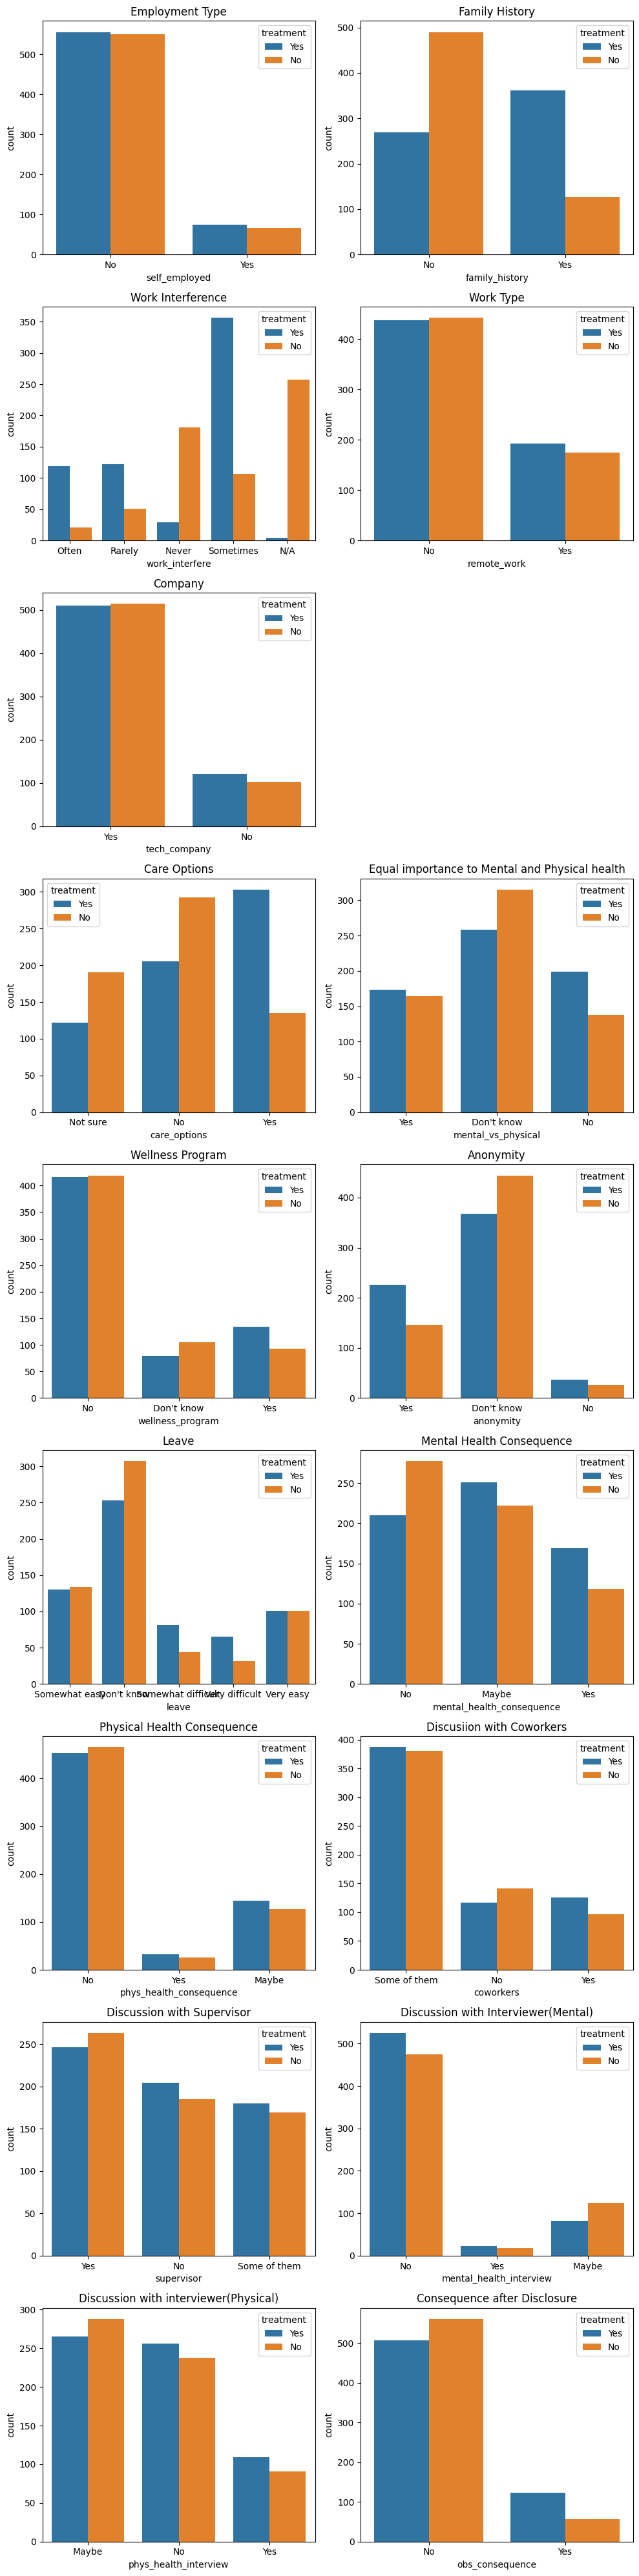

In [18]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(data = data, x = 'self_employed', hue='treatment')
plt.title('Employment Type')
plt.subplot(9, 2, 2)
sb.countplot(x='family_history', data=data, hue='treatment')
plt.title('Family History')

plt.subplot(9, 2, 3)
sb.countplot(x='work_interfere', data=data, hue='treatment')
plt.title('Work Interference')

plt.subplot(9, 2, 4)
sb.countplot(x='remote_work', data=data, hue='treatment')
plt.title('Work Type')

plt.subplot(9, 2, 5)
sb.countplot(x='tech_company', data=data, hue='treatment')
plt.title('Company')

plt.subplot(9, 2, 7)
sb.countplot(x='care_options', data=data, hue='treatment')
plt.title('Care Options')

plt.subplot(9, 2, 8)
sb.countplot(x='mental_vs_physical', data=data, hue='treatment')
plt.title('Equal importance to Mental and Physical health')


plt.subplot(9,2,9)
sb.countplot(x='wellness_program',data=data, hue='treatment')
plt.title('Wellness Program')

plt.subplot(9,2,10)
sb.countplot(x='anonymity', data=data,hue='treatment')
plt.title('Anonymity')

plt.subplot(9,2,11)
sb.countplot(x='leave', data=data,hue='treatment')
plt.title('Leave')
plt.subplot(9,2,12)
sb.countplot(x='mental_health_consequence', data=data,hue='treatment')
plt.title('Mental Health Consequence')

plt.subplot(9,2,13)
sb.countplot(x='phys_health_consequence', data=data,hue='treatment')
plt.title('Physical Health Consequence')

plt.subplot(9,2,14)
sb.countplot(x='coworkers', data=data,hue='treatment')
plt.title('Discusiion with Coworkers')

plt.subplot(9,2,15)
sb.countplot(x='supervisor', data=data,hue='treatment')
plt.title('Discussion with Supervisor')

plt.subplot(9,2,16)
sb.countplot(x='mental_health_interview', data=data,hue='treatment')
plt.title('Discussion with Interviewer(Mental)')

plt.subplot(9,2,17)
sb.countplot(x='phys_health_interview', data=data,hue='treatment')
plt.title('Discussion with interviewer(Physical)')

plt.subplot(9,2,18)
sb.countplot(x='obs_consequence', data=data,hue='treatment')
plt.title('Consequence after Disclosure')

plt.tight_layout()
plt.show()

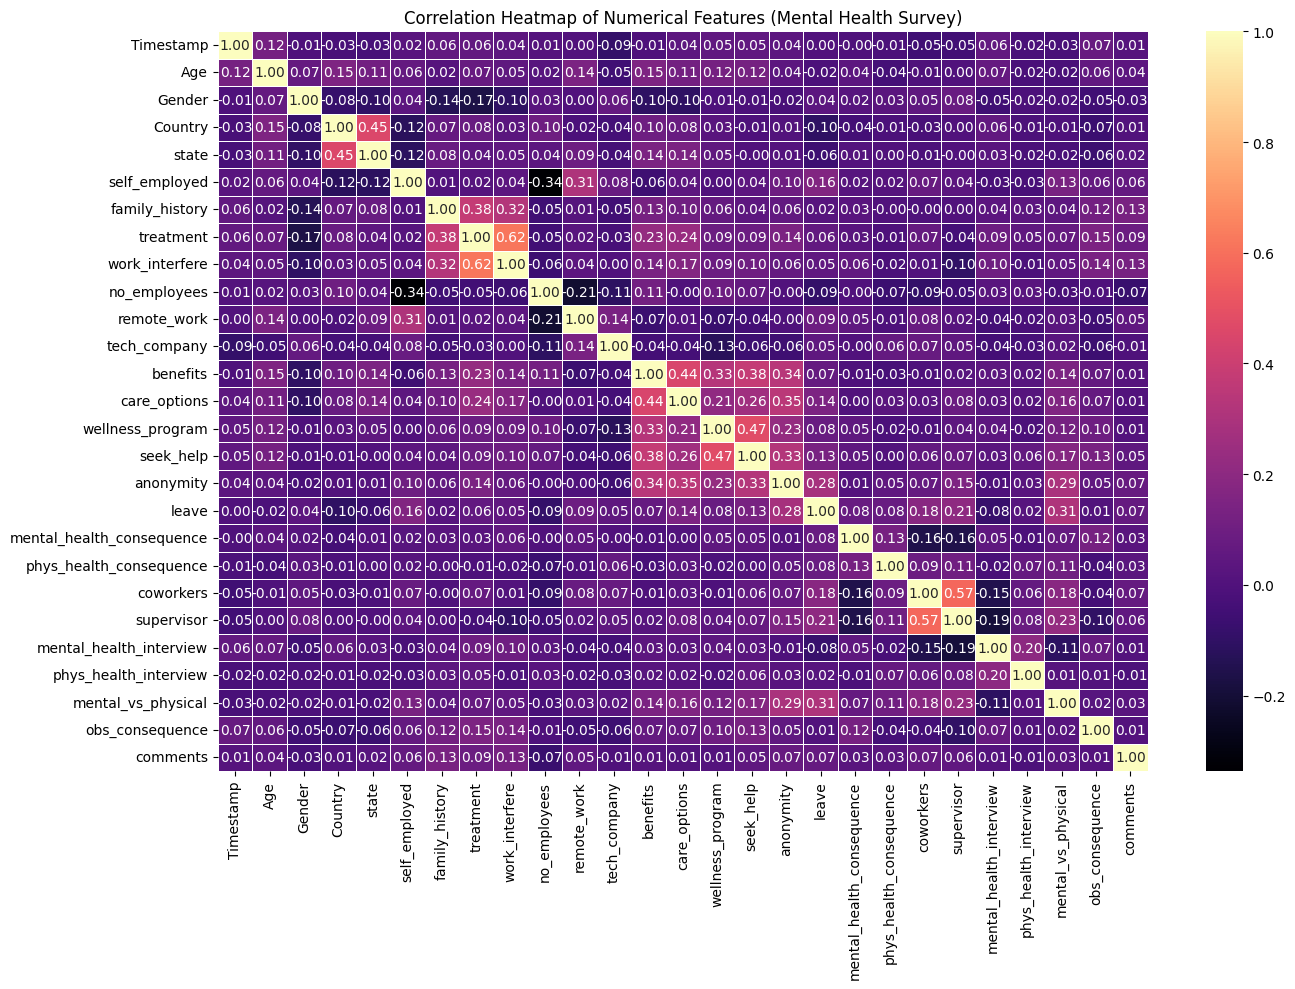

In [19]:
#multivariate analysis
df_encoded = data.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes


numerical_data = df_encoded.select_dtypes(include='number')

corr_matrix = numerical_data.corr()


plt.figure(figsize=(14, 10))
sb.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features (Mental Health Survey)")
plt.tight_layout()
plt.show()

In [20]:
data.describe(include='all')

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1247,1247.000000,1247,1247,735,1247,1247,1247,1247,1247,...,1247,1247,1247,1247,1247,1247,1247,1247,1247,161
unique,1235,NaN,5,46,45,2,2,2,5,6,...,5,3,3,3,3,3,3,3,2,157
top,2014-08-27 12:43:28,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,979,743,137,1107,759,630,463,288,...,560,487,918,767,509,1000,553,573,1068,5
mean,NaN,31.873296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,6.756424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Drop columns that won't be used for prediction
data = data.drop(['Timestamp', 'Country', 'state', 'comments'], axis=1)

# Handle missing values
data['self_employed'].fillna('No', inplace=True)
data['work_interfere'].fillna('N/A', inplace=True)

# Clean Age column
data = data[(data['Age'] >= 18) & (data['Age'] <= 60)]

# Clean Gender column
gender_map = {
    'Male ': 'Male', 'male': 'Male', 'M': 'Male', 'm': 'Male', 
    'Male': 'Male', 'Cis Male': 'Male', 'Man': 'Male', 'cis male': 'Male',
    'Mail': 'Male', 'Male-ish': 'Male', 'Male (CIS)': 'Male',
    'Cis Man': 'Male', 'msle': 'Male', 'Malr': 'Male', 'Mal': 'Male',
    'maile': 'Male', 'Make': 'Male',
    'Female ': 'Female', 'female': 'Female', 'F': 'Female', 'f': 'Female',
    'Woman': 'Female', 'Female': 'Female', 'femail': 'Female',
    'Cis Female': 'Female', 'cis-female/femme': 'Female', 'Femake': 'Female',
    'Female (cis)': 'Female', 'woman': 'Female'
}
data['Gender'] = data['Gender'].map(gender_map).fillna('Non-Binary')

X = data.drop('treatment', axis=1)
y = data['treatment']


In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder


ct = ColumnTransformer([('oe', OrdinalEncoder(), ['Gender', 'self_employed', 'family_history',
    'work_interfere', 'no_employees', 'remote_work', 'tech_company',
    'benefits', 'care_options', 'wellness_program', 'seek_help',
    'anonymity', 'leave', 'mental_health_consequence',
    'phys_health_consequence', 'coworkers', 'supervisor',
    'mental_health_interview', 'phys_health_interview',
    'mental_vs_physical', 'obs_consequence'])], remainder='passthrough')

X = ct.fit_transform(X)

le = LabelEncoder()
y = le.fit_transform(y)



In [ ]:

import joblib
joblib.dump(ct, 'feature_values')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)



In [24]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)


In [25]:
rfc = RandomForestClassifier(
    criterion='entropy',
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=3,
    n_estimators=140,
    random_state=42
)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

rfc_train_acc = accuracy_score(y_train, rfc.predict(X_train))
rfc_test_acc = accuracy_score(y_test, y_pred)

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

In [27]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

lr_train_acc = accuracy_score(y_train, lr.predict(X_train))
lr_test_acc = accuracy_score(y_test, y_pred)

In [28]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

nb_train_acc = accuracy_score(y_train, nb.predict(X_train))
nb_test_acc = accuracy_score(y_test, y_pred)

In [29]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

In [30]:
abc = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)

abc_train_acc = accuracy_score(y_train, abc.predict(X_train))
abc_test_acc = accuracy_score(y_test, y_pred)

In [31]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

gbc_train_acc = accuracy_score(y_train, gbc.predict(X_train))
gbc_test_acc = accuracy_score(y_test, y_pred)

In [32]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

In [39]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


param_grids = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [100, 200], 'max_depth': [5, 10], 'max_features': ['sqrt']}
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {'C': [0.1, 1, 10]}
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {}  # No tuning needed
    },
    'SVC': {
        'model': SVC(),
        'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
    },
    'XGBoost': {
        'model': XGBClassifier(eval_metric='logloss', use_label_encoder=False),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
    }
}

results = []

print("=" * 80)
print("🧠 Starting Model Tuning and Evaluation...\n")

for name, mp in param_grids.items():
    model = mp['model']
    params = mp['params']

    grid = GridSearchCV(model, params, cv=5, n_jobs=-1)

    if name in ['KNN', 'LogisticRegression', 'SVC']:
        grid.fit(X_train_scaled, y_train)
        preds = grid.predict(X_test_scaled)
    else:
        grid.fit(X_train, y_train)
        preds = grid.predict(X_test)

    acc = accuracy_score(y_test, preds)
    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Accuracy (%)': round(acc * 100, 2)
    })

    print(f"{'-'*80}")
    print(f"📊 Classification Report for {name}:\n")
    print(classification_report(y_test, preds))
    print(f"{'-'*80}\n")

# Convert to DataFrame for summary view
df_results = pd.DataFrame(results).sort_values(by='Accuracy (%)', ascending=False)

print("=" * 80)
print("🏁 FINAL MODEL PERFORMANCE COMPARISON:")
print(df_results.to_string(index=False))
print("=" * 80)


🧠 Starting Model Tuning and Evaluation...

--------------------------------------------------------------------------------
📊 Classification Report for DecisionTree:

              precision    recall  f1-score   support

           0       0.96      0.77      0.86       186
           1       0.81      0.97      0.88       189

    accuracy                           0.87       375
   macro avg       0.89      0.87      0.87       375
weighted avg       0.89      0.87      0.87       375

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
📊 Classification Report for RandomForest:

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       186
           1       0.83      0.90      0.87       189

    accuracy                           0.86       375
   macro avg       0.86      0.86      0.86       375
weighted avg       0.86     

In [ ]:

from sklearn.metrics import accuracy_score

def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
   

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': make_pipeline(StandardScaler(), KNeighborsClassifier()),
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'Naive Bayes': GaussianNB(),
    'SVM': make_pipeline(StandardScaler(), SVC(probability=True)),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier( eval_metric='logloss')
}
for name, model in models.items():
    evaluate_model(model, name)




Decision Tree Accuracy: 0.7733

Random Forest Accuracy: 0.8347

KNN Accuracy: 0.7707

Logistic Regression Accuracy: 0.8507

Naive Bayes Accuracy: 0.8427

SVM Accuracy: 0.8507

AdaBoost Accuracy: 0.8720

Gradient Boosting Accuracy: 0.8293

XGBoost Accuracy: 0.8400


In [ ]:
abc = AdaBoostClassifier(random_state=99)
abc.fit(X_train,y_train)
pred_abc = abc.predict(X_test)
print('Accuracy of AdaBoost-',accuracy_score(y_test,pred_abc))



Accuracy of AdaBoost- 0.872


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params_abc = {
    'n_estimators': [int(x) for x in np.linspace(start=1, stop=50, num=15)],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
}

abc_random = RandomizedSearchCV(
    random_state=49,
    estimator=abc,
    param_distributions=params_abc,
    n_iter=50,
    cv=5,
    n_jobs=-1
)
params_abc

{'n_estimators': [1, 4, 8, 11, 15, 18, 22, 25, 29, 32, 36, 39, 43, 46, 50],
 'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04]}

In [ ]:
abc_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=99),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.97, 0.98, 0.99, 1.0,
                                                          1.01, 1.02, 1.03,
                                                          1.04],
                                        'n_estimators': [1, 4, 8, 11, 15, 18,
                                                         22, 25, 29, 32, 36, 39,
                                                         43, 46, 50]},
                   random_state=49)

In [ ]:
abc_random.best_params_

{'n_estimators': 39, 'learning_rate': 1.0}

In [ ]:
abc_tuned = AdaBoostClassifier(random_state=49, n_estimators=11, learning_rate=1.02)


In [ ]:
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1.02, n_estimators=11, random_state=49)

In [ ]:
pred_abc_tuned = abc_tuned.predict(X_test)

In [ ]:
print("Accuracy of AdaBoost (tuned):", accuracy_score(y_test, pred_abc_tuned))

Accuracy of AdaBoost (tuned): 0.872


In [ ]:
cf_matrix = confusion_matrix(y_test, pred_abc)

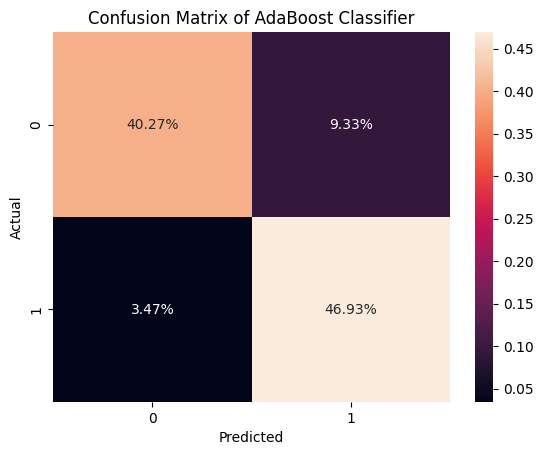

In [ ]:
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion Matrix of AdaBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
cf_matrix = confusion_matrix(y_test, pred_abc_tuned)


Text(50.722222222222214, 0.5, 'Actual')

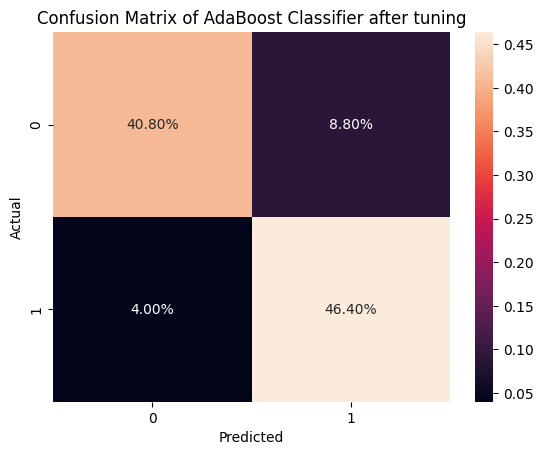

In [ ]:
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion Matrix of AdaBoost Classifier after tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')

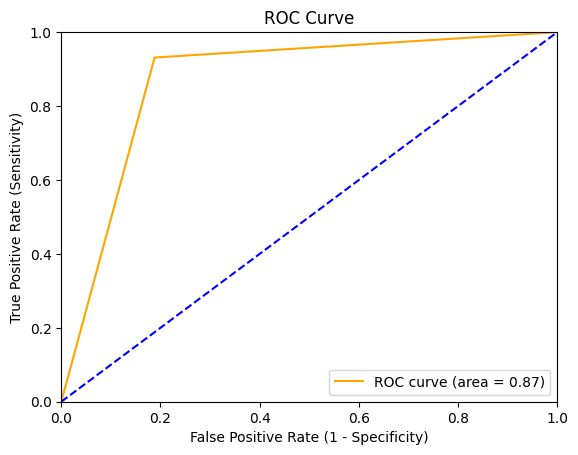

(array([0.        , 0.18817204, 1.        ]),
 array([0.        , 0.93121693, 1.        ]),
 array([inf,  1.,  0.]))

In [ ]:
from sklearn import metrics
fpr_abc, tpr_abc, thresholds_abc = roc_curve(y_test, pred_abc)
roc_auc_abc = metrics.auc(fpr_abc, tpr_abc)
plt.plot(fpr_abc, tpr_abc, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_abc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test, pred_abc)

In [ ]:
print(classification_report(y_test, pred_abc))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       186
           1       0.83      0.93      0.88       189

    accuracy                           0.87       375
   macro avg       0.88      0.87      0.87       375
weighted avg       0.88      0.87      0.87       375



In [ ]:
print(classification_report(y_test, pred_abc_tuned))
import pickle

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       186
           1       0.84      0.92      0.88       189

    accuracy                           0.87       375
   macro avg       0.88      0.87      0.87       375
weighted avg       0.88      0.87      0.87       375



In [ ]:
joblib.dump(abc_tuned, 'model.pkl')
joblib.dump(ct, 'feature_values.joblib')

['feature_values.joblib']